In [1]:
import model
import pandas as pd

In [2]:
scenario = model.CounterterrorismModel(N=200, height=3,width=4,prob_violence=0.0005,policy='NONE',reactive_lvl='none',discontent='mid')
for i in range(700):
    scenario.step()

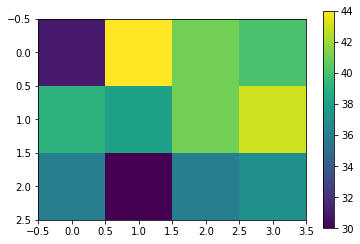

In [3]:
import numpy as np
import matplotlib.pyplot as plt

agent_counts = np.zeros((scenario.grid.width, scenario.grid.height))
for cell in scenario.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

<AxesSubplot:>

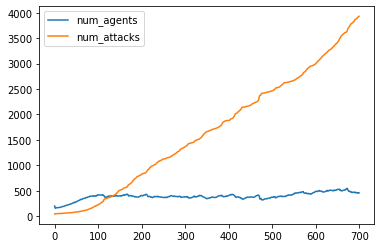

In [4]:
model_df = scenario.datacollector.get_model_vars_dataframe()
model_df.plot()

In [5]:
model_df

,num_agents,num_attacks
0,200,44
1,159,47
2,156,47
3,160,47
4,163,47
...,...,...
695,463,3895
696,461,3910
697,450,3914
698,455,3920


In [24]:
model_df.to_csv('model_df.csv')

In [6]:
agents_df = scenario.datacollector.get_agent_vars_dataframe()
agents_df

status agent_loc
Step AgentID                         
1    1          sympathetic    (2, 0)
     2              neutral    (0, 0)
     3          sympathetic    (0, 1)
     4            combatant    (1, 1)
     5            combatant    (0, 2)
...                     ...       ...
700  4377     anti-violence    (1, 1)
     4378       sympathetic    (1, 3)
     4379     anti-violence    (1, 0)
     4380           neutral    (0, 0)
     4381     anti-violence    (2, 0)

[274876 rows x 2 columns]

In [7]:
agents_df = agents_df.reset_index()
agents_df['step_cat'] = agents_df.Step.astype('str')
agent_stati_gb = agents_df.groupby(by=['step_cat','status'])

In [8]:
agent_stati = agent_stati_gb['AgentID'].nunique().reset_index()
agent_stati = agent_stati.rename(columns={'AgentID':'num_agents'})
agent_stati['step'] = agent_stati.step_cat.astype('int')

palestinian_stati = agent_stati[agent_stati.status.isin(['anti-violence','combatant','neutral','sympathetic'])]
palestinian_stati

,step_cat,status,num_agents,step
1,1,anti-violence,47,1
2,1,combatant,46,1
3,1,neutral,55,1
4,1,sympathetic,52,1
6,10,anti-violence,69,10
...,...,...,...,...
3451,98,sympathetic,78,98
3453,99,anti-violence,207,99
3454,99,combatant,4,99
3455,99,neutral,115,99


In [9]:
palestinian_stati.to_csv('palestinian_stati.csv')

<AxesSubplot:xlabel='step', ylabel='num_agents'>

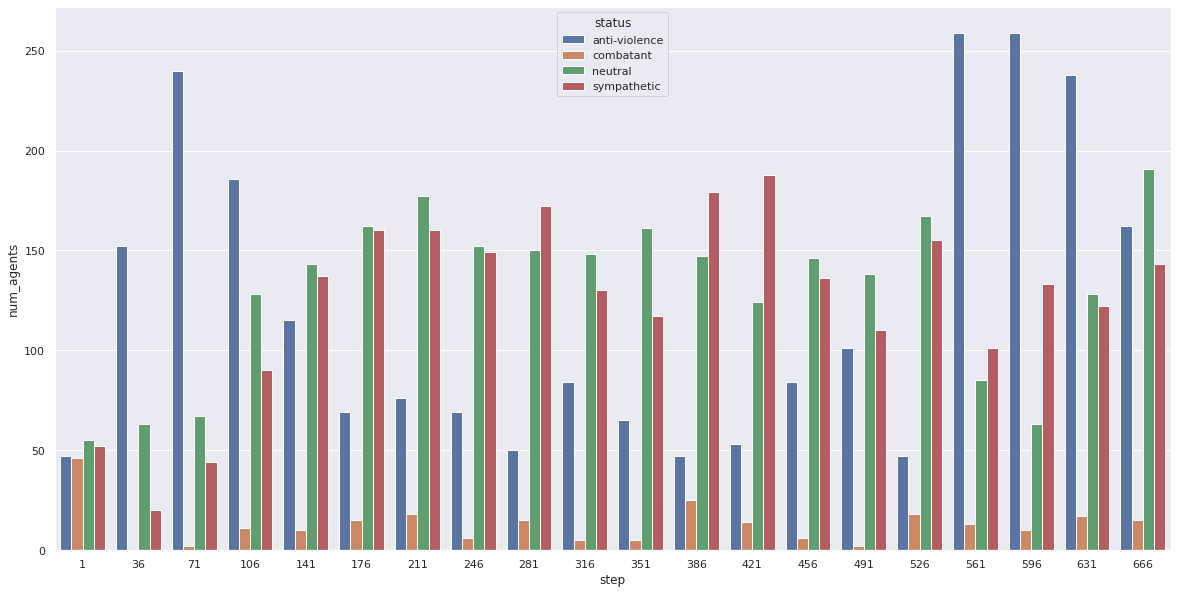

In [10]:
import seaborn as sns
import numpy as np
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

sns.barplot(x='step',y='num_agents',hue='status',data=palestinian_stati[palestinian_stati.step.isin(range(1,700,round(700*0.05)))])

neutral
sympathetic
sympathetic
sympathetic
sympathetic
neutral
sympathetic
sympathetic
sympathetic
sympathetic
sympathetic
anti-violence


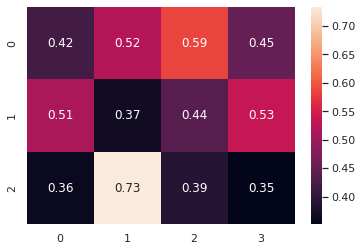

In [11]:
dominant_sentiments = np.zeros((scenario.grid.width, scenario.grid.height))
dominant_sentiments = dominant_sentiments.astype(str)
dominant_sentiments[dominant_sentiments=='0.0'] = 'none'
percent_dominant_sentiments = np.zeros((scenario.grid.width, scenario.grid.height))

for cell in scenario.grid.coord_iter():
    cell_content, x, y = cell
    status_dict = {'anti-violence':0,'NONE':0,'neutral':0,'sympathetic':0,\
        'combatant':0,'TARG-CONC':0,'TARG-REPR':0,'INDISC-CONC':0,'INDISC-REPR':0}
    for agent in cell_content:
        status_dict[agent.status] += 1

    dominant_sentiment =  max(status_dict, key = lambda x: status_dict[x])
    print(dominant_sentiment)
    if len(cell_content) > 0:
        perc_dominant_sentiment = max(status_dict.values())/len(cell_content)
    else:
        perc_dominant_sentiment = 0

    dominant_sentiments[x][y] = dominant_sentiment 
    percent_dominant_sentiments[x][y] = perc_dominant_sentiment  
     
ax = sns.heatmap(percent_dominant_sentiments, annot=True)
plt.show()

In [12]:
dominant_sentiments_df = pd.DataFrame(dominant_sentiments)
dominant_sentiments_df

,0,1,2,3
0,neutral,sympathetic,sympathetic,sympathetic
1,sympathetic,neutral,sympathetic,sympathetic
2,sympathetic,sympathetic,sympathetic,anti-violence


In [13]:
# code from stackoverflow
vals_to_int = {j:i for i, j in enumerate(pd.unique(dominant_sentiments.ravel()))}
vals_to_int

{'neutral': 0, 'sympathetic': 1, 'anti-violence': 2}

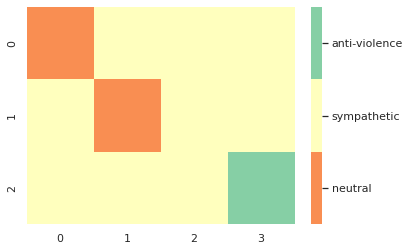

In [14]:
n = len(vals_to_int)
cmap = sns.color_palette('Spectral', n)
ax = sns.heatmap(dominant_sentiments_df.replace(vals_to_int),cmap=cmap)

colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(vals_to_int.keys()))
plt.show()

In [16]:
govt_status = agent_stati[agent_stati.status.isin(['NONE','INDISC-REPR','INDISC-CONC','TARG-CONC','TARG-REPR'])]
govt_status.drop('num_agents', axis=1,inplace=True)
govt_status = govt_status.sort_values('step',ascending=True)
govt_status

/home/npodpx/venv/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,step_cat,status,step
0,1,INDISC-REPR,1
548,2,NONE,2
1094,3,NONE,3
1641,4,NONE,4
2188,5,TARG-REPR,5
...,...,...,...
3270,696,INDISC-CONC,696
3275,697,NONE,697
3280,698,NONE,698
3285,699,NONE,699


In [30]:
govt_status = agent_stati[agent_stati.status.isin(['NONE','INDISC-REPR','INDISC-CONC','TARG-CONC','TARG-REPR'])]
govt_status.drop('num_agents', axis=1,inplace=True)
govt_status = govt_status.sort_values('step',ascending=True)
govt_status

/home/npodpx/venv/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,step_cat,status,step
0,1,INDISC-CONC,1
541,2,TARG-CONC,2
1087,3,NONE,3
1637,4,NONE,4
2174,5,NONE,5
...,...,...,...
3250,696,NONE,696
3255,697,NONE,697
3260,698,TARG-CONC,698
3265,699,NONE,699


In [17]:
govt_status_cum = govt_status.groupby(['status']).cumcount()
govt_status_cum = govt_status_cum.rename('cumulative_actions')
govt_status_cum = govt_status.join(govt_status_cum)
govt_status_cum.head(10)

,step_cat,status,step,cumulative_actions
0,1,INDISC-REPR,1,0
548,2,NONE,2,0
1094,3,NONE,3,1
1641,4,NONE,4,2
2188,5,TARG-REPR,5,0
2735,6,NONE,6,3
3290,7,NONE,7,4
3350,8,NONE,8,5
3404,9,NONE,9,6
5,10,TARG-CONC,10,0


<AxesSubplot:xlabel='step', ylabel='cumulative_actions'>

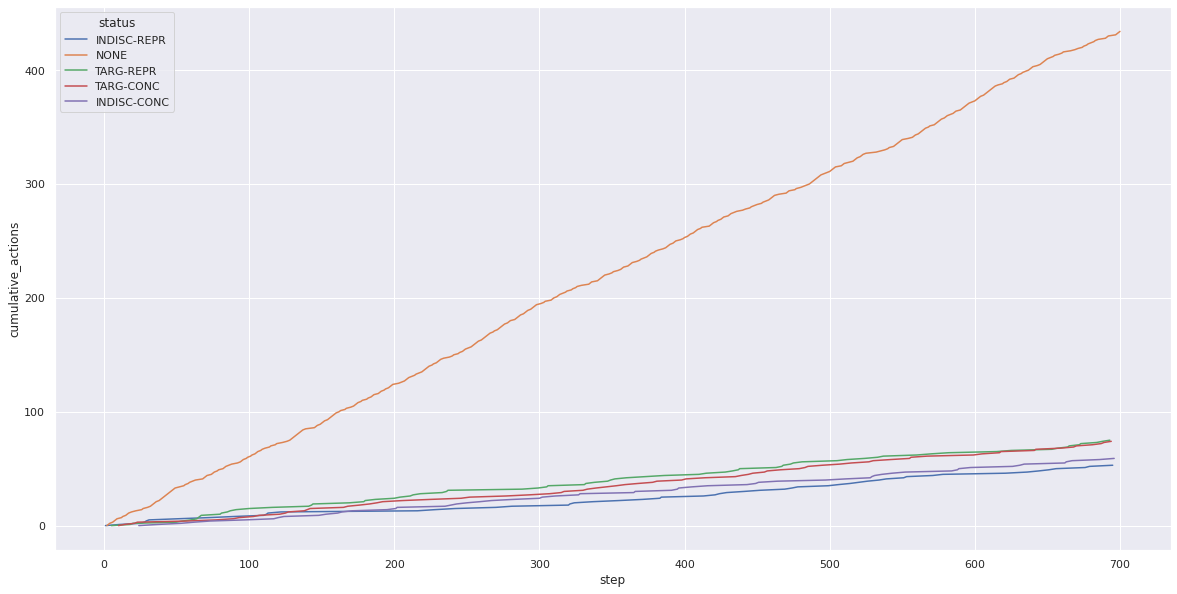

In [18]:
plt.figure(figsize=(20,10))

sns.lineplot(x='step',y='cumulative_actions',hue='status',data=govt_status_cum)

In [19]:
govt_status_cum = pd.get_dummies(govt_status['status']).cumsum()
govt_status_cum

,INDISC-CONC,INDISC-REPR,NONE,TARG-CONC,TARG-REPR
0,0,1,0,0,0
548,0,1,1,0,0
1094,0,1,2,0,0
1641,0,1,3,0,0
2188,0,1,3,0,1
...,...,...,...,...,...
3270,60,54,431,75,76
3275,60,54,432,75,76
3280,60,54,433,75,76
3285,60,54,434,75,76


In [20]:
scenario.datacollector.get_table_dataframe('Deaths')

,step,deaths
0,1,44
1,2,3
2,3,0
3,4,0
4,5,0
...,...,...
695,696,6
696,697,15
697,698,4
698,699,6


In [22]:
govt_actions = scenario.datacollector.get_table_dataframe('govt_actions')
govt_actions

,step,govt_action,action_loc,violence_aftermath
0,1,INDISC-REPR,"(0, 0)",10
1,2,NONE,"(0, 0)",10
2,3,NONE,"(0, 0)",9
3,4,NONE,"(0, 0)",8
4,5,TARG-REPR,"(1, 0)",7
...,...,...,...,...
695,696,INDISC-CONC,"(0, 0)",10
696,697,NONE,"(0, 0)",10
697,698,NONE,"(0, 0)",10
698,699,NONE,"(0, 0)",10


In [23]:
govt_actions.to_csv('govt_actions.csv')